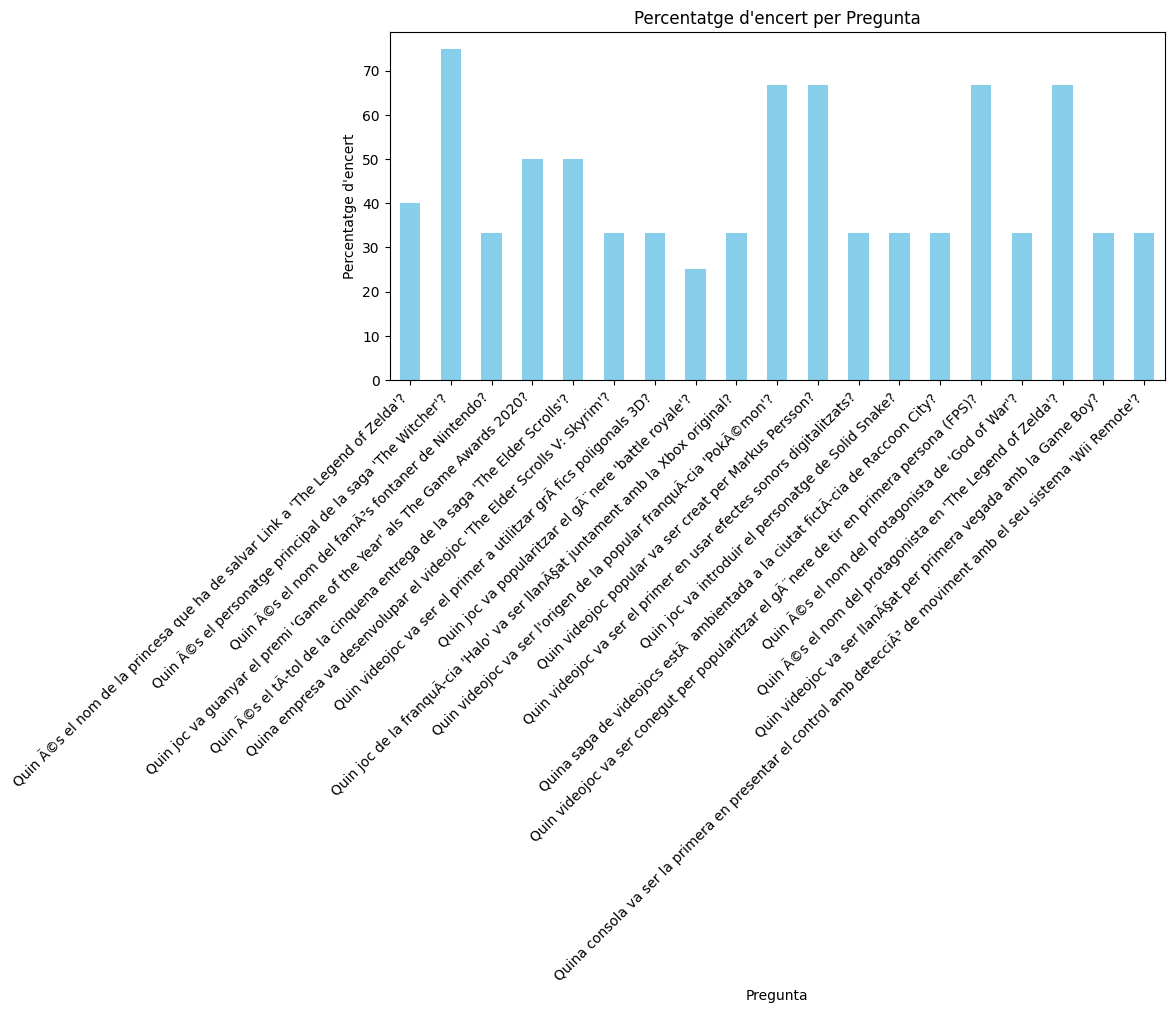

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from datetime import datetime
import os

warnings.filterwarnings("ignore")
routeData='./data/AllData.json'
statisticsRoute='./data/GameData.json'

with open(statisticsRoute) as f:
    stadisticsData = json.load(f)


Data = []
with open(routeData) as f:
    fulldata = json.load(f)

# Extract attempts and correct answers
attempts = np.array([pregunta["intents"] for pregunta in stadisticsData["dadesPerPregunta"]])
corrects = np.array([pregunta["correctes"] for pregunta in stadisticsData["dadesPerPregunta"]])

# Calculate percentages
percentages = np.round((corrects / attempts) * 100, 2)

for i, pregunta in enumerate(stadisticsData["dadesPerPregunta"]):
    for data in fulldata["preguntes"]:
        if data["id"] == pregunta["id"]:
            Data.append({
                "Pregunta": data["pregunta"],
                "Percentatge d'encert": percentages[i]
            })

df = pd.DataFrame(Data)
df.set_index("Pregunta", inplace=True)

plt.figure(figsize=(10, 6))
df["Percentatge d'encert"].plot(kind='bar', color='skyblue')
plt.title('Percentatge d\'encert per Pregunta')
plt.xlabel('Pregunta')
plt.ylabel('Percentatge d\'encert')
plt.xticks(rotation=45, ha='right')

# Adjust layout to accommodate a large number of preguntes
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)

plt.show()